# Global timer jitter experiments

**General experiment description**

In this experiment the jitter of the global timer was measured. This was done by repeatly read the global timer register in a kernel and store the retrieved value into a shared memory segment. The shared memory was chosen to have an as short as possible store time. To remove the warm-up time a few iterations of the global-timer read were performed before starting to store the timestamps.
```
static __global__ void getGlobalTimerJitter(param_t params) {
    __shared__ uint64_t times[NOF_STAMPS];
    uint64_t tmp;
    for(int i = -32; i<NOF_STAMPS; i++){
        asm volatile("mov.u64 %0, %%globaltimer;" : "=l"(tmp));
        if(i>=0){
            times[i] = tmp;
        }
    }

    // Store times to global memory
    for(int i = 0; i<NOF_STAMPS; i++){
        params.targetTimes[i+blockIdx.x*NOF_STAMPS] = times[i];
    }

    params.targetSmid[blockIdx.x] = get_smid();
}
```
The following plots illustrate the results which were collected by running the kernel with 4 blocks in parallel. The plot on the top left shows the absolute timestamps which were collected by each block in the kernel. On the top right the difference of two subsequenting timestamps can be seen. This is a direct indicator to the jitter of the global timer. In this case the stepsize per iteration varies between 0 and 162ns which is due to the jitter of reading the global-timer register and jitter of the loop execution to retrieve the times.
The two plots below provide an overview of difference of the timestamps retrived by the blocks per streaming mulitprocessor. This plots show that the propagation of the globaltimer register is not the same for each block in the system. 

**nvprof problem, or better solution**

If this experiment is ran on a clean and freshly rebooted system (figure 3 and 4), the jitter of the global timer is around ~1us which is much higher than presented in the figures 1 and 2 below. The solution to reduce the jitter of the global timer is just to simply run nvprof once on a simple executable. It seems that this step reconfigures the globaltimer register to provide a higher resolution. This behaviour is not documented by Nvidia to the best of our knowledge.

*Therefore it is recommended to run nvprof once before and measurement using the globaltimer register is performed.*

**Figure 1**

Blocks on SM: {'1': ['1', '3'], '0': ['0', '2']}


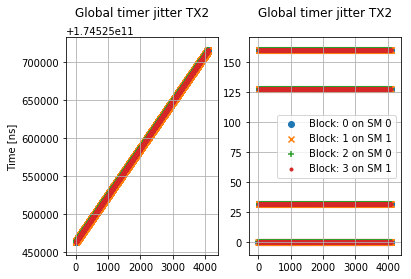

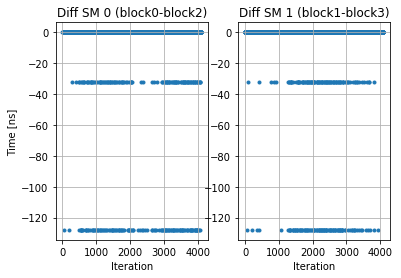

In [1]:
%matplotlib inline
from plotns import *

**Figure 2**

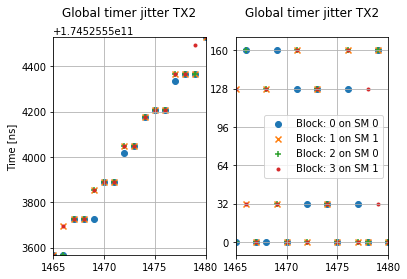

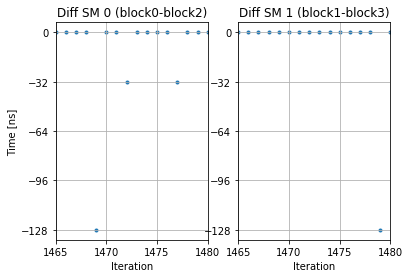

In [2]:
pltRange = (1465,1480)
fig1,ax1,fig2, ax2, blocks_sm = plotGeneralns(data)
ax1[0].set_xlim([pltRange[0], pltRange[1]])
ax1[0].set_ylim([data['times']['0'][pltRange[0]], data['times']['0'][pltRange[1]]])
ax1[1].set_xlim([pltRange[0], pltRange[1]])
beQuiet = ax1[1].set_yticks(range(0,192,32))

ax2[0].set_xlim([pltRange[0], pltRange[1]])
ax2[1].set_xlim([pltRange[0], pltRange[1]])
beQuiet = ax2[0].set_yticks(range(0,-160,-32))
beQuiet = ax2[1].set_yticks(range(0,-160,-32))
plt.show()

**Figure 3**

Experiment run after reboot and without any launch of nvprof.

Blocks on SM: {'1': ['1', '3'], '0': ['0', '2']}


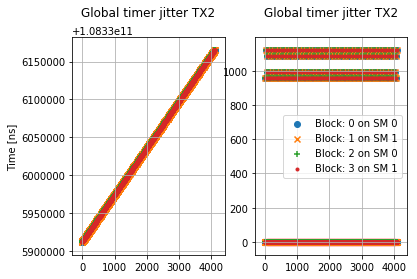

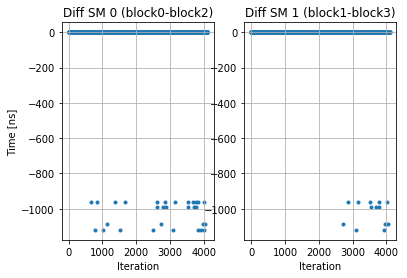

In [3]:
%matplotlib inline
from plotus import *

**Figure 4**

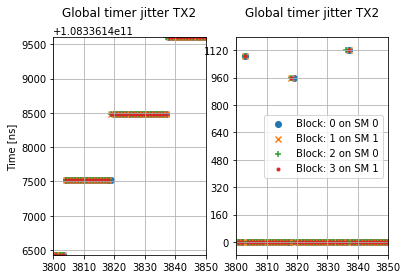

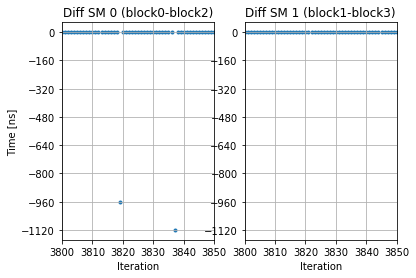

In [4]:
pltRange = (3800,3850)
fig1,ax1,fig2, ax2, blocks_sm = plotGeneralus(data)
ax1[0].set_xlim([pltRange[0], pltRange[1]])
ax1[0].set_ylim([data['times']['0'][pltRange[0]], data['times']['0'][pltRange[1]]])
ax1[1].set_xlim([pltRange[0], pltRange[1]])
#beQuiet = ax1[1].set_ylim(896,1192)
beQuiet = ax1[1].set_yticks(range(0,1192,160))

ax2[0].set_xlim([pltRange[0], pltRange[1]])
ax2[1].set_xlim([pltRange[0], pltRange[1]])
#beQuiet = ax2[0].set_ylim(-896,-1192)
#beQuiet = ax2[1].set_ylim(-896,-1192)
beQuiet = ax2[0].set_yticks(range(0,-1160,-160))
beQuiet = ax2[1].set_yticks(range(0,-1160,-160))
plt.show()